

# Training the word embeddings model, word2vec

1) Preprocess some noisy text yourself

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lorenarecalde/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
## use of some steps like tokenize, conversion of characters to lower-case, conversion of special characters á -> a, ñ->n
## removal of punctuation and removal of stopwords (the, to, an, and, a, this)

from unidecode import unidecode
from nltk.tokenize import TweetTokenizer 
#from stop_words import get_stop_words
from string import punctuation 
from nltk.corpus import stopwords

In [11]:
tknzr = TweetTokenizer()
stop_words = [unidecode(stopW) for stopW in stopwords.words('english')]

#Want to preprocess Spanish text? Remove next comment:
#stop_words = [unidecode(stopW) for stopW in stopwords.words('spanish')]

non_words = list(punctuation)
non_words.extend(['¿', '¡', 'q', 'd', 'x', 'xq', '...', '..']) #stopwords that are not present in the official punctuation/stopwords lists, then we added them 
stop_words = stop_words + non_words

In [13]:
tokens=[token.lower() for token in tknzr.tokenize(unidecode('This is a noisy TWEET, and has Spanish words like niño (boy), mamá (mom)... and tests how to clean: "special characters" @you@tube !!| #ICEDEG2018 #uuu. :(;) CAPITALS?')) 
                      if token.lower() not in stop_words]
print(tokens)

['noisy', 'tweet', 'spanish', 'words', 'like', 'nino', 'boy', 'mama', 'mom', 'tests', 'clean', 'special', 'characters', '@you', '@tube', '#icedeg2018', '#uuu', ':(', ';)', 'capitals']


In [14]:
# For you to try. Make a list of sentences that would need to be preprocessed
dirty_sentences=['Wrong sentence 1, NEED to be clean?',
                 'We have hashtags here #Nice #Cool #BAD#veryBad. Some mentions here: @my_account, @another_account',
                 'Full of stopwords like he, she, in, there, my, at, the... avoid them']

#Clean your sentences and save them in another list
clean_sentences=[] #list to put previous sentences once they are preprocessed
for dirty_sent in dirty_sentences:
    tokens=[token.lower() for token in tknzr.tokenize(unidecode(dirty_sent)) 
                          if token.lower() not in stop_words]
    processed_sentence = ' '.join(tokens) #put the list of clean extracted words of the sentence into ONE string
    clean_sentences.append(processed_sentence) #save the clean prepocessed sentence in the new list
print(clean_sentences)

['wrong sentence 1 need clean', 'hashtags #nice #cool #bad #verybad mentions @my_account @another_account', 'full stopwords like avoid']


2) Load the tweets used to train the model. They are already 'clean'.

Remember that the project employed Spanish tweets

In [15]:
from writereadfile import *  #python file that contains methods to save and load json files

In [58]:
# This is just a sample of the tweets used to train the model (319889 tweets originally employed), have a look to see what information we have...
# If you want the entire dataset, please contact the authors

#data per tweet: 
#Location from where the tweet was extracted (this was not used for the DoIP project)
#user screen_name
#user id
#tweet id
#whole tweet
#preprocessed tweet
sample = load_json('sample_100TrainingTweets')

In [59]:
print(len(sample))
print(sample[0:3])

100
[['Azuay', 'uazuay', 151210683, 793557774416445441, 'Silvia Zeas docente de la UDA, participó en Diplomacy &amp; Design evento organizado por el Dpto. de Estado de los EEUU https://t.co/ogRHLDbNPu', 'silvia zeas docente uda participo diplomacy design evento organizado dpto eeuu https://t.co/ogrhldbnpu'], ['Azuay', 'Jesus_huerta', 90235477, 793557751108669440, 'Busquets está en ese momento del curso tontete que tiene todos los años', 'busquets momento curso tontete anos'], ['Azuay', 'lanzadedios2010', 218799907, 793557645311430656, 'Saludo del obispo de Estocolmo al Santo\xa0Padre https://t.co/U5y4Cpoele https://t.co/m3BpB8CoiM', 'saludo obispo estocolmo santo padre https://t.co/u5y4cpoele https://t.co/m3bpb8coim']]


3) Train the word2vec model

In [ ]:
## conda install word2vec

In [17]:
import word2vec   #module that allow us to work with word embeddings. Implementation found in 

In [18]:
#train the model giving as input the training dataset (preprocesssed tweets in txt file) and the name of the file where we are going to save the model
#in the parameters we have assigned values for size that represents the number of dimensions for the result vectors and window to consider in which 'context' the evaluated word is going to be (words before and after target)
word2vec.word2vec('tweetsNOStemmed_corpusReady_word2vec.txt', 'my_model.bin', size=300, window= 5, verbose=True)

Starting training using file tweetsNOStemmed_corpusReady_word2vec.txt
Vocab size: 39216
Words in train file: 2425851
Alpha: 0.000029  Progress: 99.98%  Words/thread/sec: 170.35k  

4) In any case, you will find the model already trined in the file tweetsNOStemmed_words2vec300.bin

Note: if you run the previous instruction you have to change the name of the trained file by 'my_model.bin' to load it next

In [19]:
model = word2vec.load('tweetsNOStemmed_words2vec300.bin') #load the trained model -> MODELO REAL

# 
# Exploring the work of word embeddings

In [20]:
print(model.vectors.shape)   #verify the size of the vocabulary (number of words from which we extracted the vectors) and the dimensions of vector representation

(39216, 300)


5) Find similar words to the target word (ordered list considering the most similar first)

In [21]:
indexes, metrics = model.cosine('correa',10)  #target word and the number of desired results (similar words)
model.generate_response(indexes, metrics).tolist() #sentence to print results: word, measure_of_similarity (being 1 the most similar)

[('maduro', 0.854830026965647),
 ('mashi', 0.840564608085886),
 ('oposicion', 0.8391034127144901),
 ('lasso', 0.8356407433075596),
 ('corrupto', 0.8337594350651147),
 ('glas', 0.8290965386550336),
 ('fiscal', 0.8282787139071974),
 ('renuncia', 0.8207608532314712),
 ('corrupcion', 0.8204581842927038),
 ('ap', 0.8200845270492467)]

In [22]:
# You can generate your own results by changing the target word
indexes, metrics = model.cosine('maduro',10)  #target word and the number of desired results (similar words)
model.generate_response(indexes, metrics).tolist()

[('discurso', 0.8778845818785099),
 ('republica', 0.8732540018355188),
 ('@realdonaldtrump', 0.8705386661199098),
 ('#psuv', 0.8629995737770161),
 ('oposicion', 0.8613887199505295),
 ('eeuu', 0.8569219188187707),
 ('correa', 0.854830026965647),
 ('renuncia', 0.8522700851680599),
 ('rechazo', 0.8430817502366266),
 ('socialismo', 0.8429473362767007)]

In [23]:
# You can generate your own results by changing the target word
indexes, metrics = model.cosine('trump',10)  #target word and the number of desired results (similar words)
model.generate_response(indexes, metrics).tolist()

[('#trump', 0.8866592118031926),
 ('clinton', 0.8646942311228838),
 ('hillary', 0.852327168410523),
 ('obama', 0.8288899450933989),
 ('#electionnight', 0.82232959850675),
 ('donald', 0.7969633500789728),
 ('eeuu', 0.7956029189547418),
 ('barack', 0.7892092727523559),
 ('@realdonaldtrump', 0.7879030290890159),
 ('ee.uu', 0.7875286642999894)]

In [24]:
# You can generate your own results by changing the target word
indexes, metrics = model.cosine('barack',10)  #target word and the number of desired results (similar words)
model.generate_response(indexes, metrics).tolist()

[('obama', 0.9182674038460108),
 ('michelle', 0.9006819355995886),
 ('putin', 0.9000722117768036),
 ('#eeuu', 0.8774386719824087),
 ('@realdonaldtrump', 0.86788889871246),
 ('#sixto', 0.867841345356881),
 ('electo', 0.8678174873692175),
 ('https://t.co/m9sqaxmlk9', 0.8619921175598603),
 ('predijo', 0.8605492878722515),
 ('brexit', 0.8581972836350098)]

6) Do you want to try some plots?

In [25]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [26]:
model.vocab[20:30]  #model.vocab contains the list of words in the vocabulary model

array(['bien', 'vamos', 'amor', 'dias', 'quiero', '1', 'jajaja',
       '#ecuador', 'gente', '2'], dtype='<U78')

In [27]:
model['#ecuador']   #if we call the model specifying a given word, it is going to present the 300dim vector that belongs to that word

array([ 4.08693291e-02, -1.84068140e-02,  5.45866452e-02, -1.38604296e-02,
       -5.35289384e-03, -6.49315789e-02, -6.70864573e-03,  7.77363544e-03,
       -2.88114464e-03, -1.86785534e-02, -8.11225250e-02,  6.81180358e-02,
        9.02423114e-02,  5.57493567e-02, -6.61040395e-02, -5.57354502e-02,
        7.04879537e-02,  4.30657715e-02, -3.31285261e-02, -1.60975475e-02,
       -6.34655282e-02,  1.96969844e-02, -2.74433549e-02, -4.66557294e-02,
        9.27009583e-02,  8.82003829e-03, -1.25734545e-02,  9.05917585e-03,
        3.35049001e-03, -7.45473579e-02,  6.58336356e-02,  2.48171054e-02,
        4.20173677e-03,  1.73887610e-02,  2.38179583e-02, -1.10814817e-01,
        2.78830435e-02,  6.30413219e-02,  5.64590320e-02, -7.42589384e-02,
       -1.55978799e-02,  5.51821943e-03,  5.57885468e-02, -7.02620894e-02,
       -3.11840158e-02, -1.93512328e-02, -1.04655050e-01, -5.72294416e-03,
       -8.61553326e-02,  8.07043836e-02, -2.93598827e-02, -2.43600495e-02,
       -6.13732450e-02,  

In [28]:
model.vectors[27] #this is another way to get the vector of a word if we know in which position in model.vocab the word is

array([ 4.08693291e-02, -1.84068140e-02,  5.45866452e-02, -1.38604296e-02,
       -5.35289384e-03, -6.49315789e-02, -6.70864573e-03,  7.77363544e-03,
       -2.88114464e-03, -1.86785534e-02, -8.11225250e-02,  6.81180358e-02,
        9.02423114e-02,  5.57493567e-02, -6.61040395e-02, -5.57354502e-02,
        7.04879537e-02,  4.30657715e-02, -3.31285261e-02, -1.60975475e-02,
       -6.34655282e-02,  1.96969844e-02, -2.74433549e-02, -4.66557294e-02,
        9.27009583e-02,  8.82003829e-03, -1.25734545e-02,  9.05917585e-03,
        3.35049001e-03, -7.45473579e-02,  6.58336356e-02,  2.48171054e-02,
        4.20173677e-03,  1.73887610e-02,  2.38179583e-02, -1.10814817e-01,
        2.78830435e-02,  6.30413219e-02,  5.64590320e-02, -7.42589384e-02,
       -1.55978799e-02,  5.51821943e-03,  5.57885468e-02, -7.02620894e-02,
       -3.11840158e-02, -1.93512328e-02, -1.04655050e-01, -5.72294416e-03,
       -8.61553326e-02,  8.07043836e-02, -2.93598827e-02, -2.43600495e-02,
       -6.13732450e-02,  

In [29]:
## Next you have some necessary steps part of the transformation of 300dim to 2D in order to plot
pca = PCA(n_components=2)

In [30]:
# you can think of a group of words that make sense to be together/far away
toplot_words=['amor','vida','dios','feliz', #words about positive feelings 
    'emelec','bsc','ldu','aucas', 'futbol', #futbal teams in Ecuador
           'foto','videos','youtube','instagram', #media-related words
            'quito','guayaquil','loja','cuenca',  #cities in Ecuador
            'jornadas','ciencia','investigacion'  #science-related words
           ]

toplot_vecs=[model[w] for w in toplot_words] #getting the vectors for the specific words in toplot_words
result = pca.fit_transform(toplot_vecs) #call to pca for transformation

In [32]:
result

array([[ 0.12437235, -0.59028698],
       [ 0.19736724, -0.33858021],
       [-0.04616365, -0.50082517],
       [ 0.04985139, -0.42508481],
       [-0.496419  , -0.36514314],
       [-0.52996721, -0.33026377],
       [-0.41523426, -0.04059196],
       [-0.47242818, -0.10046859],
       [-0.49069593, -0.17502428],
       [ 0.40782389, -0.26030388],
       [ 0.75615452, -0.12653074],
       [ 0.64375932, -0.10875608],
       [ 0.6986262 , -0.03698112],
       [-0.37341027,  0.38051978],
       [-0.44118689,  0.40694456],
       [-0.29383315,  0.43936303],
       [-0.30049759,  0.45124415],
       [ 0.11414929,  0.66517177],
       [ 0.51333282,  0.41396456],
       [ 0.35439913,  0.64163285]])

In [33]:
for i, word in enumerate(toplot_words):
    print(i, '  ', word)

0    amor
1    vida
2    dios
3    feliz
4    emelec
5    bsc
6    ldu
7    aucas
8    futbol
9    foto
10    videos
11    youtube
12    instagram
13    quito
14    guayaquil
15    loja
16    cuenca
17    jornadas
18    ciencia
19    investigacion


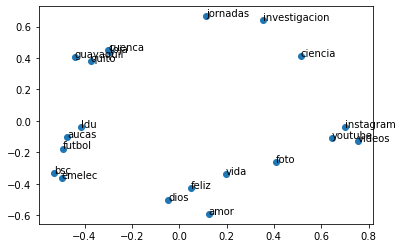

In [35]:
# finally plotting...
pyplot.scatter(result[:, 0], result[:, 1]) #result[:, 0] -> todas las posiciones eje x
for i, word in enumerate(toplot_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1])) #en la posicion xy, poner la anotación word
pyplot.show()

7) You can try with your own list of words... 

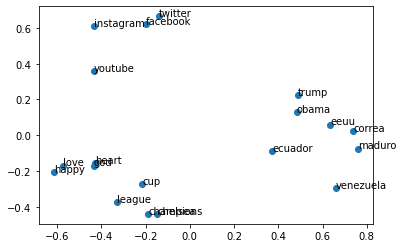

In [36]:
# you can think of a group of words that make sense to be together/far away to view in the plot
toplot_words=['love','god','happy','heart', #words about positive feelings 
    'champions','league','chelsea', 'cup', #futbal-related terms
           'facebook','youtube','instagram', 'twitter', #media-related words
            'obama','trump','eeuu','maduro','correa','ecuador','venezuela'  #politics-related words
           ]

toplot_vecs=[model[w] for w in toplot_words] #getting the vectors for the specific words in toplot_words
result = pca.fit_transform(toplot_vecs) #call to pca for transformation

# finally plotting...
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(toplot_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

8) You can also test the quality of your model with some analogies in the form:
    
    King - Man + Woman = Queen

In [37]:
indexes, metrics = model.analogy(pos=['correa', 'venezuela'], neg=['ecuador'], n=10) #correa - ecuador + venezuela = maduro
model.generate_response(indexes, metrics).tolist()

[('maduro', 0.4263944639966871),
 ('lasso', 0.40729094607970695),
 ('oposicion', 0.40562774550031194),
 ('reeleccion', 0.4054969867258512),
 ('renuncia', 0.40305186915591723),
 ('corrupto', 0.40084997164549374),
 ('juez', 0.4004735888628086),
 ('dictadura', 0.39849469487197753),
 ('xxi', 0.39677423503706233),
 ('discurso', 0.39527126646092015)]

In [38]:
# try yourself
indexes, metrics = model.analogy(pos=['trump', 'hillary'], neg=['donald'], n=10)
model.generate_response(indexes, metrics).tolist()

[('#trump', 0.3329897919139735),
 ('#electionnight', 0.31483786144454606),
 ('clinton', 0.3109994735543806),
 ('tromp', 0.30839522240703793),
 ('ganara', 0.2901256343793681),
 ('#electionday', 0.28541029234294535),
 ('@realdonaldtrump', 0.28234967340147343),
 ('usa', 0.2797593135983981),
 ('gane', 0.27698264800611183),
 ('muro', 0.2763383133152767)]

In [39]:
# try yourself
indexes, metrics = model.analogy(pos=['youtube', 'fotos'], neg=['videos'], n=10)
model.generate_response(indexes, metrics).tolist()

[('facebook', 0.2857027714600086),
 ('instagram', 0.27222726740277614),
 ('buscanos', 0.2693438551339776),
 ('page', 0.2679556915867689),
 ('messenger', 0.2662501759752386),
 ('publicado', 0.2641219745969717),
 ('#foto', 0.26371522940815073),
 ('@franklinminval', 0.2613964736566457),
 ('https://t.co/nju1qwxr5k', 0.2585214866197614),
 ('escribio', 0.25846444335905416)]

In [40]:
# try yourself
indexes, metrics = model.analogy(pos=['fidel', 'eeuu'], neg=['cuba'], n=10)
model.generate_response(indexes, metrics).tolist()

[('https://t.co/m9sqaxmlk9', 0.27241866172739415),
 ('donald', 0.27027506518918615),
 ('obama', 0.26912891802154826),
 ('usa', 0.26792075198276194),
 ('ee.uu', 0.2671217326223029),
 ('amenaza', 0.267121164821016),
 ('@realdonaldtrump', 0.26214686491366496),
 ('clinton', 0.2616784736535376),
 ('fbi', 0.26158762340800734),
 ('hillary', 0.2614322290808239)]

9) As the words in the vocabulary have a vector representation we can measure how similar two words are

In [43]:
from scipy import spatial 

In [44]:
# cosine similarity metric is going to be used
sim1=float("{0:.3f}".format(1 - spatial.distance.cosine(model['obama'],model['maduro'])))  #the similarity of two observations is equal to 1 - theirDistance
sim2=float("{0:.3f}".format(1 - spatial.distance.cosine(model['obama'],model['trump'])))
sim3=float("{0:.3f}".format(1 - spatial.distance.cosine(model['obama'],model['shakira'])))

print('Similarity between "obama" and "maduro":' + str(sim1))
print('Similarity between "obama" and "trump":' + str(sim2))
print('Similarity between "obama" and "shakira":' + str(sim3))

Similarity between "obama" and "maduro":0.799
Similarity between "obama" and "trump":0.829
Similarity between "obama" and "shakira":0.323


In [45]:
# More examples...
sim1=float("{0:.3f}".format(1 - spatial.distance.cosine(model['universidad'],model['ciencia'])))  #the similarity of two observations is equal to 1 - theirDistance
sim2=float("{0:.3f}".format(1 - spatial.distance.cosine(model['universidad'],model['investigacion'])))
sim3=float("{0:.3f}".format(1 - spatial.distance.cosine(model['universidad'],model['futbol'])))

print('Similarity between "universidad" and "ciencia":' + str(sim1))
print('Similarity between "universidad" and "investigacion":' + str(sim2))
print('Similarity between "universidad" and "futbol":' + str(sim3))

Similarity between "universidad" and "ciencia":0.559
Similarity between "universidad" and "investigacion":0.676
Similarity between "universidad" and "futbol":0.186


# Custering the words

10) As it was shown in step 9), we can measure the distance of a word with respect to another vector of the same dimensional space. In clustering, to categorize a new observation (once the clusters/categories are defined) we see who similar it is to the corresponding cluster centroids. The word will belong to the cluster where a smallest distance was reported.

To define the clusters, the module word2vec provides a function already implemented:

In [46]:
#The parameters are 1.the training corpus txt file; 2.output txt file that will contain the clustered words; 3.the number of desired clusters
word2vec.word2clusters('tweetsNOStemmed_corpusReady_word2vec.txt', 'my_clusters.txt', 5, verbose=True)

Starting training using file tweetsNOStemmed_corpusReady_word2vec.txt
Vocab size: 39216
Words in train file: 2425851
Alpha: 0.000025  Progress: 99.98%  Words/thread/sec: 299.34k  

In [47]:
# The clusters we worked with in our research are saved in the file tweetsNOStemmed_clusters5.txt
# You can change the name of the file if you want to use your result clusters
clusters = word2vec.load_clusters('tweetsNOStemmed_clusters5.txt')  #load the clusters previously found

In [48]:
# let's check the number of words in each cluster
print(clusters.get_words_on_cluster(0).shape)
print(clusters.get_words_on_cluster(1).shape)
print(clusters.get_words_on_cluster(2).shape)
print(clusters.get_words_on_cluster(3).shape)
print(clusters.get_words_on_cluster(4).shape)

(5661,)
(8304,)
(2326,)
(13884,)
(5710,)


11) By analyzing the words in each cluster we may have an intuition about the topics or categories for those groups of words (Remember that we defined cluster 2 as the Political-related one):

In [49]:
clusters.get_words_on_cluster(0)[:50]

array([b'ahora', b'dia', b'gracias', b'asi', b'vida', b'solo', b'mp3',
       b'mejor', b'siempre', b'bien', b'amor', b'dias', b'quiero',
       b'jajaja', b'mundo', b'manana', b'ver', b'hace', b'amigos',
       b'hacer', b'dios', b'nunca', b'va', b'tan', b'aqui', b'vez',
       b'feliz', b'tiempo', b'cada', b'sonrisa', b'jajajaja', b'buen',
       b'buenos', b'cosas', b'dos', b'tener', b'ano', b'amo', b'nadie',
       b'voy', b'alguien', b'bueno', b'foto', b'jaja', b'mismo', b'casa',
       b'mal', b'hola', b'noche', b'menos'], dtype=object)

In [50]:
clusters.get_words_on_cluster(1)[:50]

array([b'</s>', b'video', b'@youtube', b'via', b'emitiendo', b'3', b'1',
       b'2', b'gusto', b'nuevo', b'retweeted', b'gustado', b'2016', b'7',
       b'saludos', b'partido', b'5', b'10', b'4', b'vivo', b'lista',
       b'15', b'san', b'primer', b'gana', b'c', b'saludo', b'minutos',
       b'0', b'->', b'vs', b'audio', b'oro', b'by', b'2017', b'diario',
       b'the', b'proximo', b'tras', b'gol', b'juan', b'm',
       b'reproduccion', b'comparte', b'machala', b'i', b'@c0nvey',
       b'colombia', b'carlos', b'oficial'], dtype=object)

In [51]:
clusters.get_words_on_cluster(2)[:50]

array([b'ecuador', b'ser', b'pais', b'anos', b'vamos', b'gente',
       b'@mashirafael', b'personas', b'puede', b'gran', b'):',
       b'presidente', b'nacional', b'trabajo', b'dice', b'gobierno',
       b'pueblo', b'parte', b'familia', b'momento', b'debe', b'trump',
       b'podemos', b'favor', b'apoyo', b'equipo', b'@jorgeglas', b'ley',
       b'correa', b'poder', b'asamblea', b'proyecto', b'cambio',
       b'politica', b'falta', b'@lenin', b'mujeres', b'historia', b'paz',
       b'seguir', b'educacion', b'campana', b'millones', b'acuerdo',
       b'dinero', b'ecuatorianos', b'candidatos', b'pueden', b'violencia',
       b'@gabrielaespais'], dtype=object)

12) In which cluster a given word is? Try next code

In [52]:
print(clusters.get_cluster(b'correa'))
print(clusters.get_cluster(b'maduro'))
print(clusters.get_cluster(b'clinton'))
print(clusters.get_cluster(b'obama'))

2
2
2
2


In [53]:
print(clusters.get_cluster(b'champions'))
print(clusters.get_cluster(b'league'))
print(clusters.get_cluster(b'chelsea'))
print(clusters.get_cluster(b'gol'))

1
1
1
1


13) The centroid of a cluster, is the most representative point within the group. Generally, this is the mean of the values of the observations in the cluster.

We took the word vectors found in a given cluster and found the mean in order to have the centroids. In summary, for our experiments the centroids were saved in the json file 'all_clusters5_300'

In [54]:
centroids=load_json('all_clusters5_300') #load the file that contains the 5 centroids, centroid in position 2 is the one taht characterizes political content

In [55]:
len(centroids) #there are 5 centroids (corresponding to the 5 clusters of words found)

5

In [56]:
#vector for the political related centroid

# How similar is a tweet to the Politics-related Centroid?

14) Finding the vector for a tweet based on its words' vectors.

We took the tweet's words, extract the vectors and find the average. Then we will have a vector representation for that tweet.

Remember that we have a sample of 100 tweets which are already preprocessed (step 2) in this notebook)

Example:  ['Azuay', 'uazuay', 151210683, 793557774416445441, 'Silvia Zeas docente de la UDA, participó en Diplomacy &amp; Design evento organizado por el Dpto. de Estado de los EEUU https://t.co/ogRHLDbNPu', 'silvia zeas docente uda participo diplomacy design evento organizado dpto eeuu https://t.co/ogrhldbnpu']

In [60]:
#check the data in sample
print('First tweet in sample:\n' + sample[0][4]) #text of the tweet in position 4
print('First tweet in sample, but preprocessed:\n' + sample[0][5]) #text of the tweet in position 5

print('Last tweet in sample:\n' + sample[99][4]) #text of the tweet in position 4
print('Last tweet in sample, but preprocessed:\n' + sample[99][5]) #text of the tweet in position 5

First tweet in sample:
Silvia Zeas docente de la UDA, participó en Diplomacy &amp; Design evento organizado por el Dpto. de Estado de los EEUU https://t.co/ogRHLDbNPu
First tweet in sample, but preprocessed:
silvia zeas docente uda participo diplomacy design evento organizado dpto eeuu https://t.co/ogrhldbnpu
Last tweet in sample:
[MAQUINARIA] Iniciamos las fiestas de #Cuenca con el financiamiento de maquinaria, un aporte del Gobierno Nacional https://t.co/dBRbwnLbkD
Last tweet in sample, but preprocessed:
maquinaria iniciamos fiestas #cuenca financiamiento maquinaria aporte gobierno nacional https://t.co/dbrbwnlbkd


We will run two steps in this part:

    a. Find the vector of the preprocessed tweet by averaging its words vectors
    
    b. Calculate the similatity of the tweet (vector) to the 5 centroids

In [61]:
import numpy as np

In [62]:
# 
for t in sample[10:20]:
    similarities=[] #save the 5 calculations of similarity(tweet,cluster)
    words_tweet=t[5].split() #take the preprocessed tweet words and save them in a list
    words_vecs=np.array([]).reshape(0,300) #creates an array empty to then acumulate the word vectors with concatenate
    num_words=0 #controlls the number of tweet's words that actually were in the model vocabulary (otherwise the word has no vector representation)
    
    for w in words_tweet:
        if w in model.vocab:  #model.vocab contains the list of words in the vocabulary model:
            num_words+=1
            #to save in a data structure the vectors of the words to later find the mean:
            words_vecs=np.concatenate((words_vecs,model[w].reshape(1,300)))#model[w].reshape(1,300) puts array([[1,2,....300]]) double bracket format
        
    if num_words is not 0: #if it is 0 it means that the tweet has no words in the model, then cannot be represented as vector
        tweet_vec=(np.mean(words_vecs, axis=0)).tolist() #average the vectors of the words in tweet
        #Calculate the similatity of the tweet (vector) to the 5 centroids
        for cent in centroids:
            simC=float("{0:.3f}".format(1 - spatial.distance.cosine(tweet_vec,cent)))
            similarities.append(simC)
    else:
        print('Error with tweet, it cannot be represented as vector')
        continue
            
    print('Tweet: '+t[4])
    for s in range(len(similarities)):
        print('Similarity to cluster '+str(s)+' = '+str(similarities[s]))

        

Tweet: 🤘🏼Ya están listas 👕🤘🏼 #losdespachos #band #rock #rockband #cuenca #ecuador #músicaindeoendiente https://t.co/dIpb8RbaRt
Similarity to cluster 0 = 0.563
Similarity to cluster 1 = 0.83
Similarity to cluster 2 = 0.699
Similarity to cluster 3 = 0.759
Similarity to cluster 4 = 0.907
Tweet: Continuamos construcción caminerías a calle Roma. #AlcaldeConObras. @CholaCabrera @tomebamba @eltiempocuenca… https://t.co/EPPScjQXpk
Similarity to cluster 0 = 0.377
Similarity to cluster 1 = 0.698
Similarity to cluster 2 = 0.634
Similarity to cluster 3 = 0.634
Similarity to cluster 4 = 0.905
Tweet: @jdiegocornejo Delantero potente, fuerte y con gol, sería una buena contratación.
Similarity to cluster 0 = 0.846
Similarity to cluster 1 = 0.874
Similarity to cluster 2 = 0.772
Similarity to cluster 3 = 0.896
Similarity to cluster 4 = 0.739
Tweet: ¡No te creas que mucho más que la del núcleo irradiador! Es lo que tiene un gilipollas: que dice gilipolleces. https://t.co/MBm7VD9Mz8
Similarity to cluster 

<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-62-92d61891b85a>:14: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if num_words is not 0: #if it is 0 it means that the tweet has no words in the model, then cannot be represented as vector


Now you could create a method to know how interested in politics a Twitter user is... I hope you enjoyed the tutorial

Our proposal is presented next:

# DoIP already calculated for some users

In [63]:
user_tweets_tendency=load_json('users_sample')
print(len(user_tweets_tendency)) #excluded with no tweets in model: 10 users from 3906, see file users_tendencyPolitics_exp1_excluded.json

500


In [64]:
#print an example of result
user_tweets_tendency[0]  #this user had 1387 tweets, but 22 tweets couldn't be modeled

[242121420,
 1387,
 0.025,
 0.925,
 0.014,
 0.025,
 0.011,
 22,
 [[[809263611478687745, 'LA LEYENDA DEL COLIBRÍ - https://t.co/672KBmh1UG'],
   'leyenda colibri https://t.co/672kbmh1ug',
   [0.71, 0.787, 0.591, 0.729, 0.622],
   1],
  [[809212524382093312,
    'lenguaje colonial no ha cambiado desde la conquista: llamar "barbarie" la defensa de un mundo en harmonia con, no s… https://t.co/jL4IZVU2qc'],
   'lenguaje colonial cambiado conquista llamar barbarie defensa mundo harmonia s https://t.co/jl4izvu2qc',
   [0.81, 0.788, 0.855, 0.913, 0.77],
   3],
  [[809203966877847553,
    'El Estado de Excepcion siempre es utilizado por el estado para suspender soberania ciudadana y legitimar violencia total #SanCarlosPanantza'],
   'excepcion siempre utilizado suspender soberania ciudadana legitimar violencia total #sancarlospanantza',
   [0.588, 0.624, 0.952, 0.789, 0.82],
   2],
  [[808720316776251392,
    "Beyond whether this serves Russia's interests or not, #RexTillerson as Secretary of S

16) We run a validation by calculating the DoIP of few Ecuadorian politicians. We wanted to see if the largest similarities of their tweets were respect to the cluster 2 instead to the rest of the clusters.

Explore next file with the results. Its format has 38551 politicians' tweets. You will find the classification

In [65]:
politicians_tweets_tendency=load_json('clusters_test_politicians_similarities')

In [66]:
politicians_tweets_tendency[0:20] #print the 20 fist tweets in the list

[['CynthiaViteri6',
  808361969698869252,
  '#EnVivo Encuentro con universitarios en la @USFQ_Ecuador: https://t.co/eyKQw5dZ6m',
  [0.468, 0.715, 0.76, 0.681, 0.897],
  4],
 ['CynthiaViteri6',
  808333587976175616,
  'Les comparto un resumen de los temas que tratamos hoy en nuestro #EnlaceRadial en  @RadioMorena \n⚡️ \nhttps://t.co/reGvBBpenl',
  [0.558, 0.64, 0.729, 0.677, 0.783],
  4],
 ['CynthiaViteri6',
  808309818192777216,
  'Si lo que se "gana de más" por plusvalía segun el gobierno es ilegítimo, ¿Por qué se lo queda el Estado?',
  [0.548, 0.523, 0.796, 0.681, 0.523],
  2],
 ['CynthiaViteri6',
  808290023439212544,
  'En un solo MES se va a aplicar un proyecto en que el Presidente dice qué está bien ganar y qué está mal.',
  [0.679, 0.476, 0.749, 0.675, 0.471],
  2],
 ['CynthiaViteri6',
  808129080436596736,
  'Acompáñanos,mañana a las 12h00, en la @USFQ_Ecuador para hablar del #CambioPositivo que junto a @MauricioPozoEC pod… https://t.co/DUXd76VVCm',
  [0.62, 0.621, 0.771, 0.69

In [70]:
politicians_tweets_tendency[3000:3020] #print the 20 fist tweets in the list

[['LassoGuillermo',
  706880990585733120,
  'Queridos amigos, mañana estaré en enlace radial. Aquí les comparto las radios en las que pueden escucharlo. https://t.co/cmCkKwvscj',
  [0.548, 0.496, 0.545, 0.558, 0.584],
  4],
 ['LassoGuillermo',
  706548795140653056,
  'Ustedes, por su esfuerzo generoso se han ganado el respeto de toda la sociedad ecuatoriana.',
  [0.638, 0.438, 0.832, 0.667, 0.544],
  2],
 ['LassoGuillermo',
  706548584972492800,
  'Aprovecho la ocasión para expresar, no sólo mi solidaridad, sino también mi admiración y respeto por las personas que forman parte de SOLCA.',
  [0.728, 0.578, 0.871, 0.801, 0.684],
  2],
 ['LassoGuillermo',
  706548339114909696,
  '...de lo que necesita SOLCA para sostener el servicio que brinda, peor va a poder con el 100% de la responsabilidad.',
  [0.628, 0.527, 0.89, 0.765, 0.7],
  2],
 ['LassoGuillermo',
  706548265555271684,
  'Es un disparate porque si no puede cumplir con una parte, establecida en la ley promovida por su gobierno...